In [165]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [166]:
df = pd.read_csv('/content/fcc-forum-pageviews.csv', index_col='date', parse_dates=True)
df.head()

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933


In [167]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1304 entries, 2016-05-09 to 2019-12-03
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   value   1304 non-null   int64
dtypes: int64(1)
memory usage: 20.4 KB


In [168]:
df.describe()

,value
count,1.304000e+03
mean,6.722068e+04
std,5.933964e+04
min,1.201000e+03
25%,3.575775e+04
50%,5.719750e+04
75%,8.388300e+04
max,1.173655e+06


In [169]:
df = df.loc[(df['value'] >= df['value'].quantile(0.025)) & (df['value'] <= df['value'].quantile(0.975))]

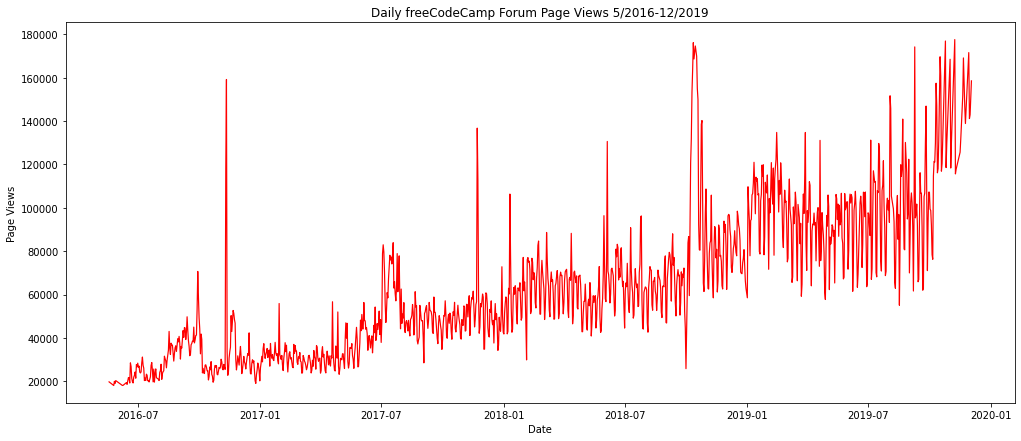

In [171]:
fig, axe = plt.subplots(figsize=(17,7))
plt.plot(df.index, df['value'], color='red', linewidth=1.2)
axe.set_title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
axe.set_xlabel('Date')
axe.set_ylabel('Page Views')
fig.savefig('lineplot.png')

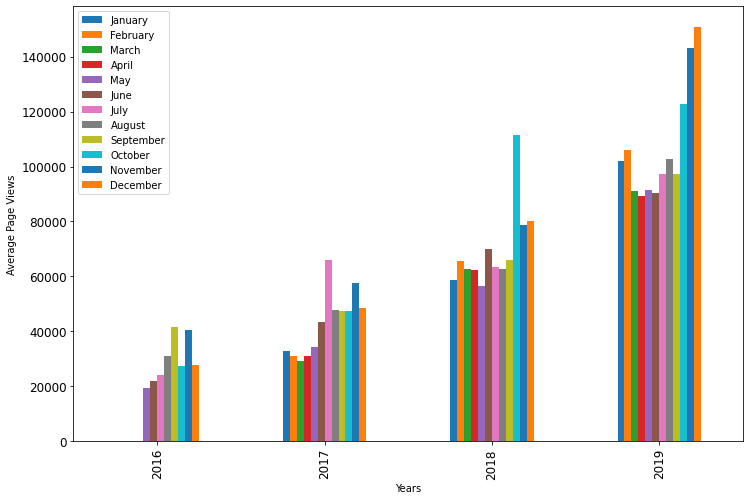

In [172]:
#barplot
df['month'] = df.index.month
df['year'] = df.index.year
df_bar = df.groupby(by=['year', 'month'])['value'].mean()
df_bar = df_bar.unstack(level=1)

fig = df_bar.plot(figsize=(12,8), kind='bar', xlabel='Years', ylabel='Average Page Views', fontsize=12).figure
plt.legend(['January','February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
fig.savefig('bar_plot.png')

In [179]:
df_box = df.copy()
df_box.reset_index(inplace=True)
df_box['year'] = [ d.year for d in df_box.date]
df_box['month'] = [d.strftime('%b') for d in df_box.date]
df_box.head()
# df_box.date.dt.month

,date,value,month,year
0,2016-05-19,19736,May,2016
1,2016-05-26,18060,May,2016
2,2016-05-27,19997,May,2016
3,2016-05-28,19044,May,2016
4,2016-05-29,20325,May,2016


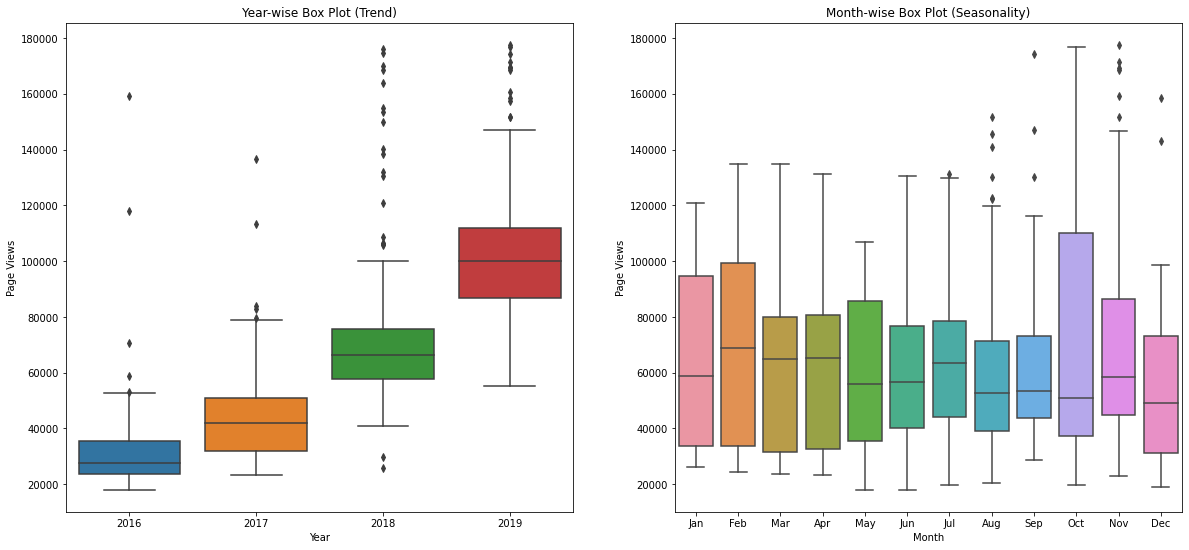

In [174]:
fig, axes = plt.subplots(1,2, figsize=(20,9))
axes[0] = sns.boxplot(x=df_box['year'], y=df_box['value'], ax=axes[0])
axes[1] = sns.boxplot(x=df_box['month'], y=df_box['value'], ax=axes[1], order=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])

axes[0].set_title('Year-wise Box Plot (Trend)')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Page Views')

axes[1].set_title('Month-wise Box Plot (Seasonality)')
axes[1].set_xlabel('Month')
axes[1].set_ylabel('Page Views')

fig.savefig('box_lot.png')